In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# K Means

## 1. Explore

## 2. Build Model

In [2]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


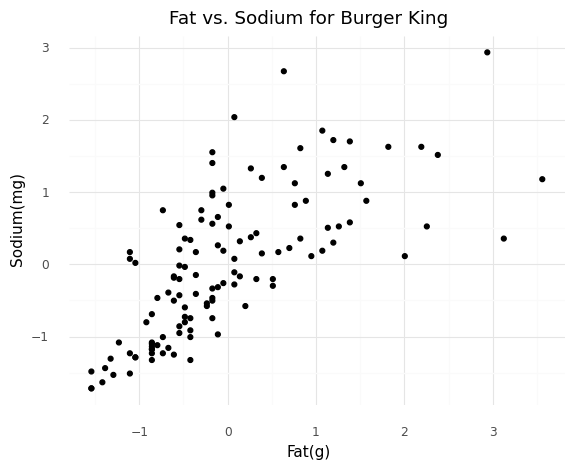

<ggplot: (346679658)>

In [3]:
# data
features = ["Fat(g)", "Sodium(mg)"]
X = bk[features]

# z
z = StandardScaler()

X[features] = z.fit_transform(X[features])

# plot

(ggplot(X, aes(x = "Fat(g)", y = "Sodium(mg)")) + geom_point() + theme_minimal() + labs(title = "Fat vs. Sodium for Burger King"))

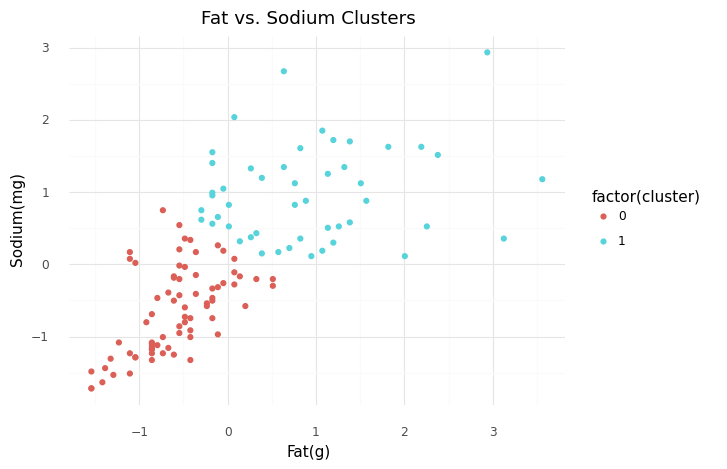

<ggplot: (346792491)>

In [6]:
# km
km = KMeans(n_clusters = 2)
km.fit(X)

# labels
membership = km.predict(X)

X["cluster"] = membership

X
# plot

(ggplot(X, aes(x = "Fat(g)", y = "Sodium(mg)", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Fat vs. Sodium Clusters"))

## 3. Evaluate Model

In [7]:
silhouette_score(X[features], membership)

0.4888133809282478

# Another Example

In [8]:
features = ["Fat(g)", "Sodium(mg)", "Calories", "Chol(mg)",
            "Sugar(g)", "Protein(g)"]

X = bk[features]

z = StandardScaler()

X[features] = z.fit_transform(X[features])

# model

km = KMeans(n_clusters = 5)
km.fit(X)

membership = km.predict(X)
X["cluster"] = membership

print(silhouette_score(X[features], membership))

0.27978382591529743


In [9]:
membership

array([1, 4, 4, 4, 4, 4, 4, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 4, 4, 0,
       0, 0, 4, 0, 0, 0, 4, 1, 1, 1, 1, 4, 4, 1, 4, 4, 4, 4, 0, 0, 0, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 0, 4, 1, 3,
       0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 2, 2, 4,
       1, 1, 4, 4, 2, 2, 1, 1, 2, 2, 0, 0, 0, 4, 0, 0, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

## Choosing K

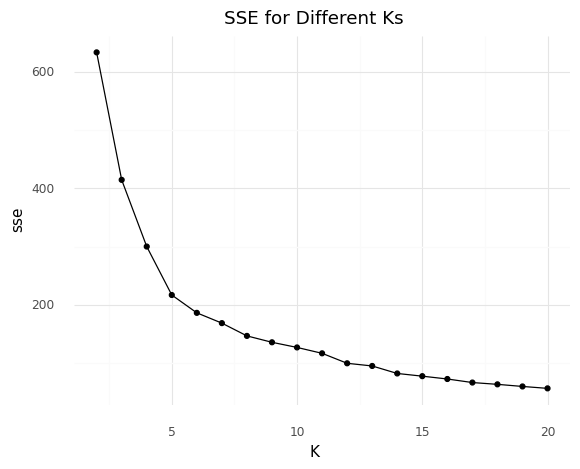

<ggplot: (-9223372036505834471)>

In [11]:
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sse = []
sils = []

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})

(ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "SSE for Different Ks"))

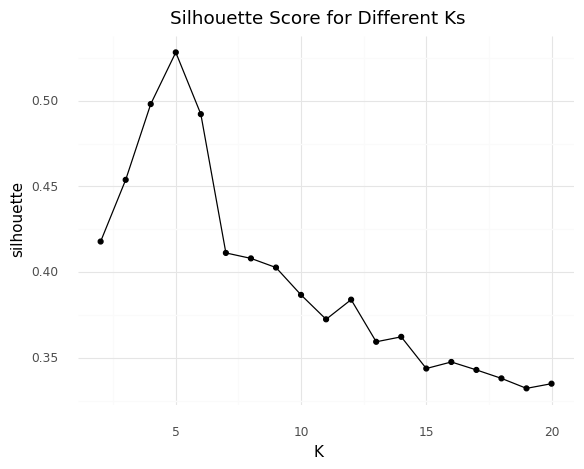

<ggplot: (-9223372036505810344)>

In [12]:
# sil
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

# Another Another Example
Data from [here](https://www.kaggle.com/josephvm/major-league-soccer-dataset/version/51?select=all_players.csv).

In [13]:
d = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/all_players.csv"
mls = pd.read_csv(d)
mls.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,...,2,0.14,20,39,70,2,0,64.47,1996,reg
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,...,2,0.08,32,26,35,6,1,49.00,1996,reg
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,...,3,0.27,48,26,25,5,0,64.37,1996,reg
3,Preki,KC,M,32,32,2880,18,13,140,61,...,4,0.41,26,44,7,3,0,43.57,1996,reg
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,...,1,0.12,21,46,10,0,0,55.70,1996,reg


In [19]:
mls2018 = mls.loc[mls.Year == 2018,]
mls2018.shape

(829, 28)

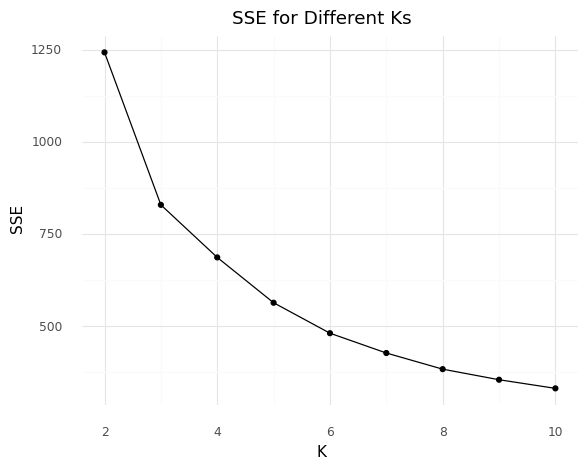

<ggplot: (349042054)>

In [20]:
pred = ["G", "A", "FC"]

ks = [2,3,4,5,6,7,8,9,10]
sse = []
sils = []

X = mls2018[pred]

z = StandardScaler()

X[pred] = z.fit_transform(X)

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks, "SSE": sse, "Silhouette": sils})
(ggplot(sse_df, aes(x = "K", y = "SSE")) + geom_point() + geom_line() + theme_minimal() +
labs(title = "SSE for Different Ks"))

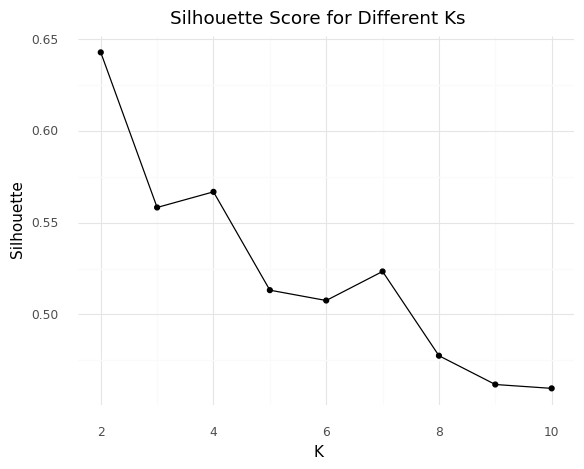

<ggplot: (355387477)>

In [22]:
(ggplot(sse_df, aes(x = "K", y = "Silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

In [23]:
km = KMeans(n_clusters = 4)
km.fit(X)

mls2018["cluster"] = km.predict(X)
mls2018.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season,cluster
8337,Josef Martinez,ATL,F,34,34,2898,31,6,97,56,...,0.19,24,31,35,1,0,57.73,2018,reg,1
8338,Zlatan Ibrahimovic,LA,F,27,24,2143,22,10,116,49,...,0.42,36,34,27,5,1,42.24,2018,reg,1
8339,Bradley Wright-Phillips,LAFC,F,32,28,2536,20,8,82,37,...,0.28,32,55,31,7,0,45.12,2018,reg,1
8340,Mauro Manotas,HOU,F,33,30,2633,19,1,95,43,...,0.03,24,20,23,1,0,45.26,2018,reg,1
8341,Gyasi Zardes,CLB,F,33,33,2948,19,0,88,40,...,0.00,27,33,20,3,0,45.45,2018,reg,1


## Summarize Clusters


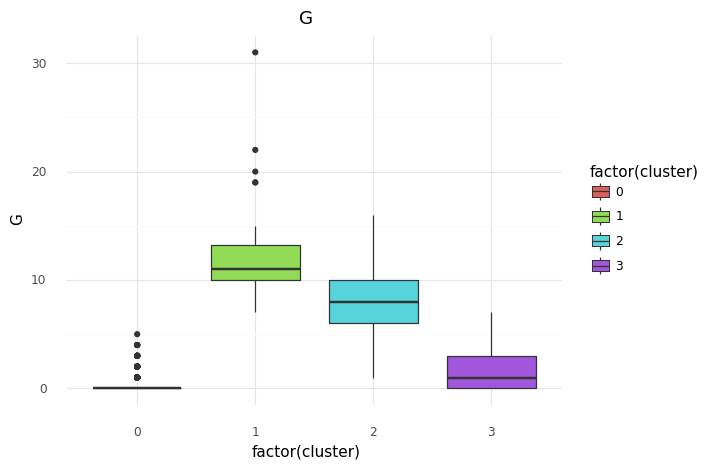

<ggplot: (-9223372036499353084)>


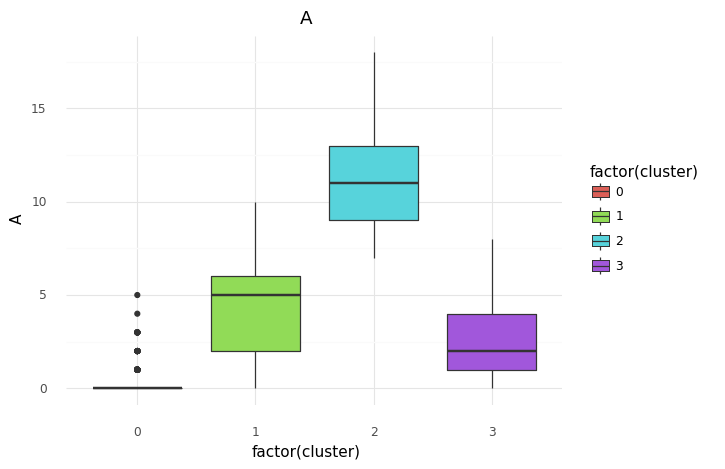

<ggplot: (355422952)>


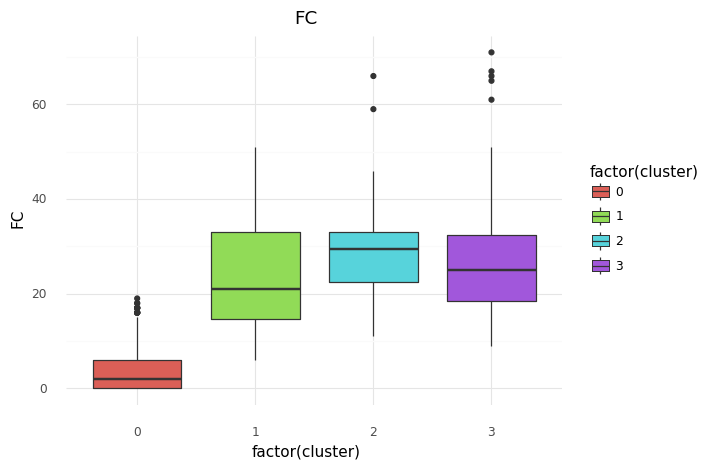

<ggplot: (-9223372036499336651)>


In [27]:
for p in pred:
    print(ggplot(mls2018, aes(x = "factor(cluster)", y = p,
                             fill = "factor(cluster)")) +
         geom_boxplot() + theme_minimal() + 
         labs(title = p))

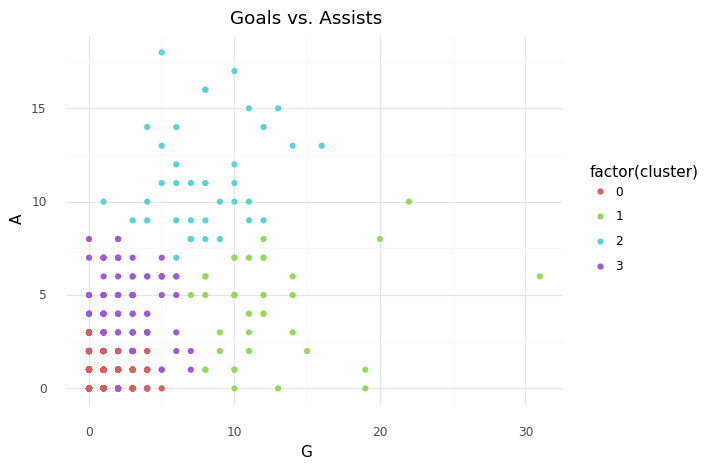

<ggplot: (-9223372036499253090)>

In [28]:
(ggplot(mls2018, aes(x = "G", y = "A", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "G", y = "A", title = "Goals vs. Assists"))

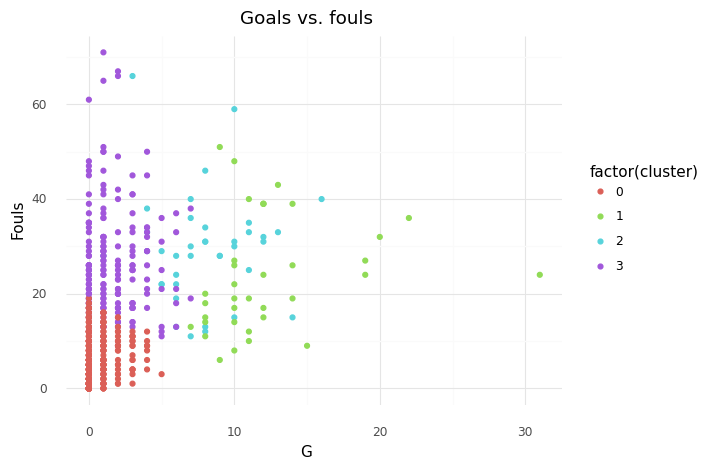

<ggplot: (-9223372036499334477)>

In [29]:
(ggplot(mls2018, aes(x = "G", y = "FC", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "G", y = "Fouls", title = "Goals vs. fouls"))

In [31]:
mls2018.groupby("cluster").mean()[["G", "A", "FC"]]

,G,A,FC
cluster,,,
0,0.347518,0.317376,4.054965
1,12.277778,4.222222,23.944444
2,7.947368,11.263158,29.473684
3,1.670157,2.554974,26.947644


In [34]:
mls2018.loc[mls2018.cluster == 3,"Player"].sample(10)

8554           Russell Teibert
8925    Antonio Mlinar Delamea
8418            Larrys Mabiala
8636               Tyler Adams
8581               Abu Danladi
8622              Chris McCann
8542                Jack Price
8923            Adolfo Machado
8656         Michael Parkhurst
8531                    Felipe
Name: Player, dtype: object

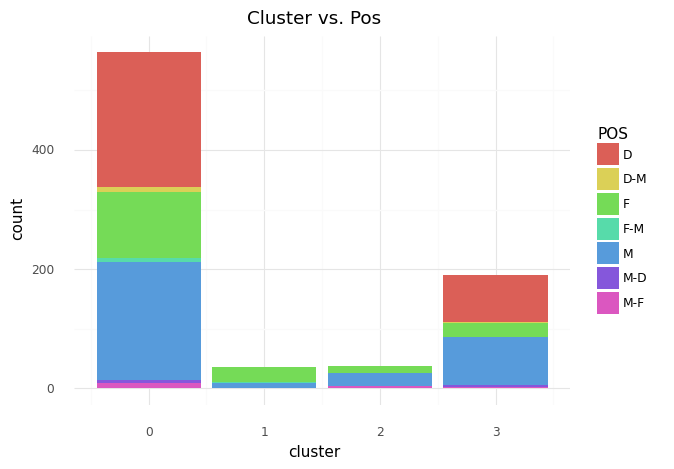

<ggplot: (355788808)>

In [35]:
(ggplot(mls2018, aes(x = "cluster", fill = "POS")) + geom_bar() + theme_minimal() + labs(title = "Cluster vs. Pos"))

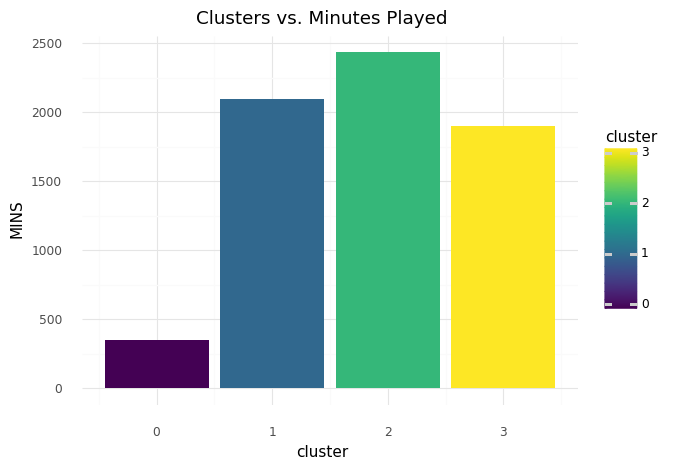

<ggplot: (-9223372036498945448)>

In [37]:
(ggplot(mls2018, aes(x = "cluster", y = "MINS", fill = "cluster")) +
 stat_summary(fun_data = "mean_sdl", geom = "bar") +
theme_minimal() + labs(title = "Clusters vs. Minutes Played"))